# Харлунин А.А. (M32021 | ФВЧФ 1.1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# №1

In [2]:
def computational_derivative_lagrange(x_array, y_array):
    n = len(x_array)
    
    der_y_array = np.empty(n)

    for i in range(n):
        if i == 0:
            h = x_array[1] - x_array[0]
            der_y_array[0] = (-3*y_array[0] + 4*y_array[1] - y_array[2])/(2*h)
        elif i == n-1:
            h = x_array[n-1] - x_array[n-2]
            der_y_array[n-1] = (y_array[n-3] - 4*y_array[n-2] + 3*y_array[n-1])/(2*h)
        else:
            h = x_array[i] - x_array[i-1]
            der_y_array[i] = (y_array[i+1] - y_array[i-1])/(2*h)
            
    return der_y_array

In [3]:
def f(x):
    return math.exp(-2*x)

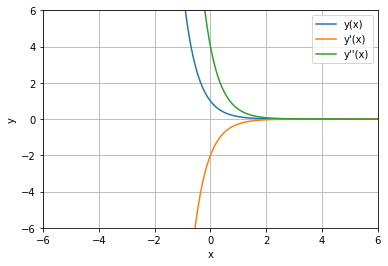

In [4]:
x = np.linspace(-10,10,250)
y = np.array(list(map(f, x)))

plt.xlabel('x')
plt.ylabel('y')
plt.xlim( -6, 6 ) 
plt.ylim( -6, 6 ) 
plt.grid(True)

plt.plot(x, y, label="y(x)")

der_y = computational_derivative_lagrange(x,y)
plt.plot(x, der_y, label="y'(x)")

der_y_2 = computational_derivative_lagrange(x,der_y)
plt.plot(x, der_y_2, label="y''(x)")

plt.ioff()
plt.legend()
plt.show()

# №2

In [5]:
def solution_dichodomy(x_array, y_array, eps = 0.01):
    if eps < x_array[1] - x_array[0]:
        raise ValueError(f"eps is less than possible accuracy ({eps} < {x_array[1] - x_array[0]})")
    
    same_sign      = lambda a, b: a < 0 and b < 0 or a > 0 and b > 0
    different_sign = lambda a, b: a < 0 and b > 0 or a > 0 and b < 0
    
    n = len(x_array)
    
    i_min, i_max = 0, n - 1
    
    i_mid = (i_min + i_max) // 2 
    mid_prev = None
    
    while True:
        
        if abs(y_array[i_mid]) <= eps:
            break
        elif mid_prev == i_mid:
            break;
        else:
            mid_prev = i_mid
            
        i_min, i_max = (i_min, i_mid) if different_sign(y_array[i_min], y_array[i_mid]) \
                        else (i_mid, i_max)
        
        
        i_mid = (i_min + i_max) // 2 
        
        
    return x_array[i_mid], y_array[i_mid]

In [6]:
def f(x):
    return math.exp(-2*x) - 2

x = np.linspace(-100,100,1000000)
y = np.array(list(map(f, x)))

print(solution_dichodomy(x, y, 0.05))

(-0.3421003421003377, -0.017813191080440882)


In [7]:
def solution_dichodomy_steps(x_array, y_array, eps = 0.01):
    if eps < x_array[1] - x_array[0]:
        raise ValueError(f"eps is less than possible accuracy ({eps} < {x_array[1] - x_array[0]})")
    
    same_sign      = lambda a, b: a < 0 and b < 0 or a > 0 and b > 0
    different_sign = lambda a, b: a < 0 and b > 0 or a > 0 and b < 0
    
    n = len(x_array)
    
    steps = 0
    
    i_min, i_max = 0, n - 1
    
    i_mid = (i_min + i_max) // 2 
    mid_prev = None
    
    while True:
        
        if abs(y_array[i_mid]) <= eps:
            break
        elif mid_prev == i_mid:
            break;
        else:
            mid_prev = i_mid
            
        i_min, i_max = (i_min, i_mid) if different_sign(y_array[i_min], y_array[i_mid]) \
                        else (i_mid, i_max)
        steps += 1
        
        i_mid = (i_min + i_max) // 2 
        
        
    return steps

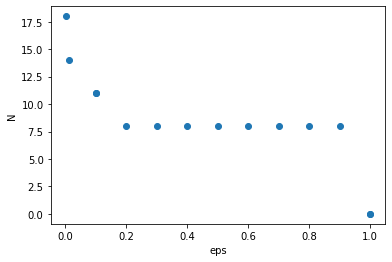

In [8]:
x_ = np.array(list(np.linspace(0.1,1,10)) + [1/10**i for i in range(4)])
y_ = np.array([solution_dichodomy_steps(x, y, eps_) for eps_ in x_])

plt.xlabel('eps')
plt.ylabel('N')
plt.scatter(x_, y_)
plt.show()

In [9]:
def solution_newthon(unaryfunc, x_init = 0, eps = 0.05):
    
    def derivative_numeric(unaryfunc, x, h=0.00000001):
        return (unaryfunc(x+h) - unaryfunc(x)) / h
    
    x = x_init - unaryfunc(x_init)/derivative_numeric(unaryfunc, x_init)
    
    while True:
        
        if abs(unaryfunc(x)) <= eps:
            break
            
        x -= unaryfunc(x)/derivative_numeric(unaryfunc, x)
        
    return x, unaryfunc(x)

In [10]:
print(solution_newthon(f))

(-0.3470211495467517, 0.0017910385434261045)


In [11]:
def solution_newthon_steps(unaryfunc, x_init = 0, eps = 0.05):
    
    def derivative_numeric(unaryfunc, x, h=0.00000001):
        return (unaryfunc(x+h) - unaryfunc(x)) / h
    
    x = x_init - unaryfunc(x_init)/derivative_numeric(unaryfunc, x_init)
    
    steps = 0
    
    while True:
        
        if abs(unaryfunc(x)) <= eps:
            break
            
        steps += 1
        
        x -= unaryfunc(x)/derivative_numeric(unaryfunc, x)
        
    return steps

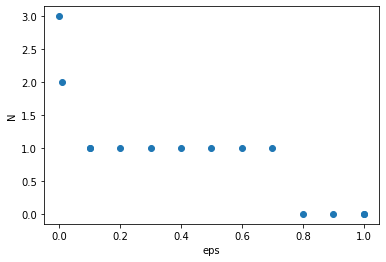

In [12]:
x_ = np.array(list(np.linspace(0.1,1,10)) + [1/10**i for i in range(4)])
y_ = np.array([solution_newthon_steps(f, eps=eps_) for eps_ in x_])

plt.xlabel('eps')
plt.ylabel('N')
plt.scatter(x_, y_)
plt.show()

# №3

In [13]:
def s_t(t):
    return -5*t**2 + 30*t + 20

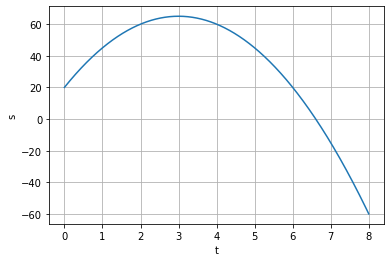

In [14]:
t = np.linspace(0,8,1000)
s = np.array(list(map(s_t, t)))

plt.xlabel('t')
plt.ylabel('s')
plt.grid(True)

plt.plot(t, s)
plt.show()

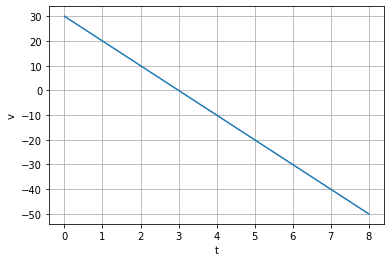

In [15]:
v = computational_derivative_lagrange(t, s)

plt.xlabel('t')
plt.ylabel('v')
plt.grid(True)
plt.plot(t, v)
plt.show()

In [16]:
t0 = solution_dichodomy(t, s)[0]
print(f"t0 = {t0}")

t1 = solution_dichodomy(t, v)[0]
print(f"t1 = {t1}")

t0 = 6.598598598598598
t1 = 2.994994994994995
